In [1]:
#Import all the libraries to prefom data anlysis.
import pandas as pd #Pandas is used to to apply operations on datafram.
import numpy as np #Numpy is numerical python use to perform mathematical operations.
import matplotlib.pyplot as plt #Used for visualization
import seaborn as sns #used for visulaization
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing the airbnb_new_york dataset to the variable name df using pandas.
df=pd.read_csv('ab_nyc_2019.csv', encoding='latin1')

In [3]:
#Printing the first 5 rows of the dataframe.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
#Below code returns the number of rows and columns availbale in the dataframe.
df.shape

(48895, 16)

In [5]:
#.info() return the datatype and availability of any null values in any column of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#Below code is provides no. of elements, min, max, standard devition and other quantile values.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
#isnull() is used to know if there is any null values.
#if one any() is used the it will return null value availibility of each column and twice is used to know for the wholw dataframe.
df.isnull().any().any()

True

In [8]:
#.sum() return the number of null values present in the columns.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the above detail we can see that name, host_name, last_value and reviews_per_month has some null values which if used will give wrong prediction or forecasting.

In [9]:
#Here we are deleting latitude. longitude, last_review & reviews_per_month columns to get the optimal analysis of the dataframe.
df.drop(['latitude', 'longitude','last_review','reviews_per_month'], inplace=True, axis=1)

In [10]:
#again printing first 10 rows to check if those columns are deleted or not.
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


In [11]:
#Deleting remaining null values form name & host_name columns.
df.dropna(inplace=True)

In [12]:
#again checking the number of rows and columns of the data after completing the cleaning part.
df.shape

(48858, 12)

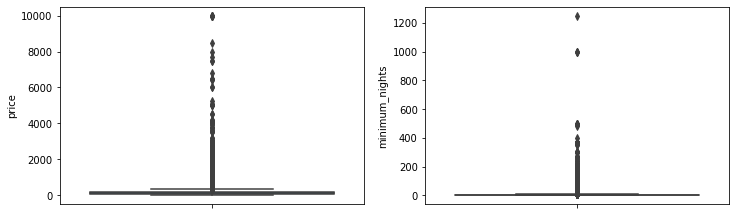

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df)

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

print(IQR)

id                                19681668.50
host_id                           99615754.25
price                                  106.00
minimum_nights                           4.00
number_of_reviews                       23.00
calculated_host_listings_count           1.00
availability_365                       227.00
dtype: float64


In [19]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

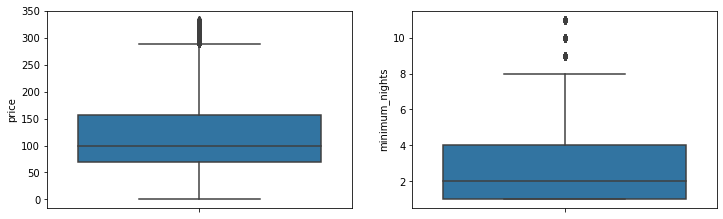

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df_out)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df_out)

In [21]:
Q_1 = df_out.quantile(0.25)
Q_3 = df_out.quantile(0.75)

IQR_new = Q_3-Q_1

In [92]:
df_out_new = df_out[~((df_out < (Q_1 - 1.5 * IQR_new)) |(df_out > (Q_3 + 1.5 * IQR_new))).any(axis=1)]

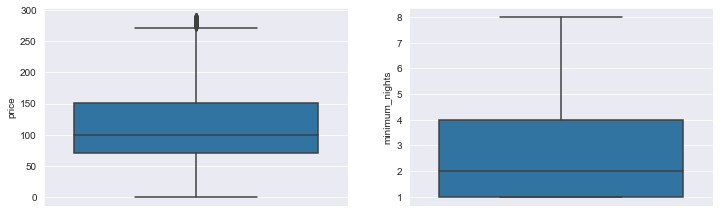

In [93]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df_out_new)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df_out_new)

In [36]:
df1= df_out_new.drop(['id', 'name', 'host_id', 'host_name', 'number_of_reviews','calculated_host_listings_count','availability_365'], axis=1)

# Visualization

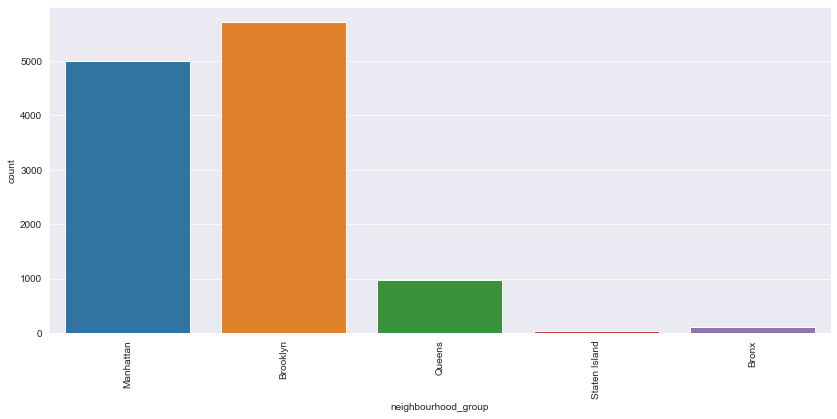

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))
plt.xticks(rotation = 90)
sns.countplot(df_out_new['neighbourhood_group'])

 The above figure shows that people are opting more for Manhattan and Broklyn as compared to Queens, Staten Island and Bronx

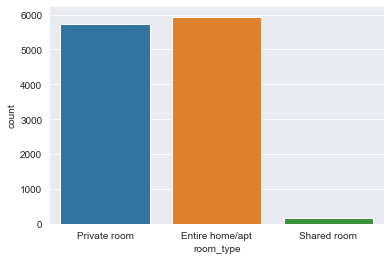

In [31]:
sns.countplot(df_out_new['room_type'])

Above figure clearly states that peoples don't want shared rooms, they want either a private room or a complete home/apt room_type

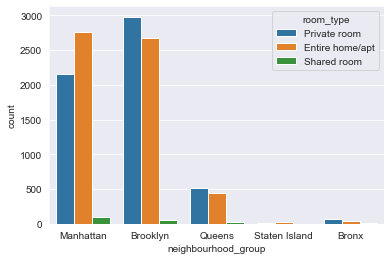

In [32]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=df_out_new)

Already visulized that Manhattan is prefeered more but only in Manahattan peoples are preferring entire home/Apartment more than private, shared room as compared to other cities where private rooms are more preferred.

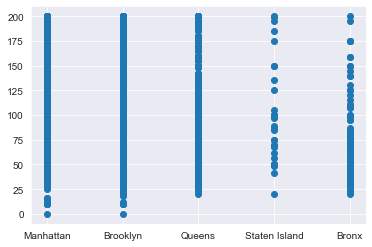

In [33]:
plt.scatter(x='neighbourhood_group', y='price', data=df_out_new )

Manhattan, Broklyn and Queen have the maximum price of 10000 but Staten Island and Bronx have 5000 and 2250 respectively.

In [44]:
#In the below code we are using groupby() function so that every category present inside the neighborhood_group cloumn
#can be made into individual unit with all its other values to be transformed into their sum or with their mean values.
df_agg = df_out_new.groupby(['neighbourhood_group'])
price=df_agg['price'].agg(np.sum)
number_of_reviews=df_agg['number_of_reviews'].agg(np.sum)
minimum_nights=df_agg['minimum_nights'].agg(np.mean)

Text(0, 0.5, 'Mean Number of Reviews')

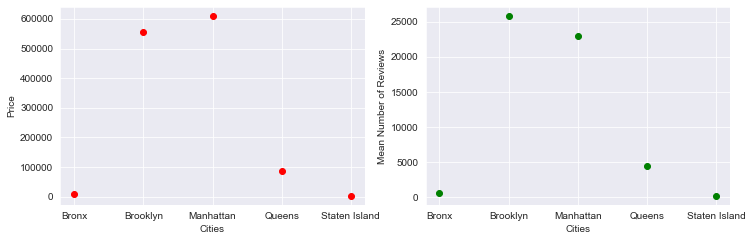

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(price, 'ro')
plt.ylabel('Price')
plt.xlabel('Cities')

plt.subplot(222)
plt.plot(number_of_reviews, 'go')
plt.xlabel('Cities')
plt.ylabel('Mean Number of Reviews')

We have already visualized that peoples are visiting Manhattan more so the hottel room expending is also more in Manhattan as shown in figure 1 but from the 2nd figure we can see that the mean reviews of Manhattan is also very low and Sataten Island has very high reviews.

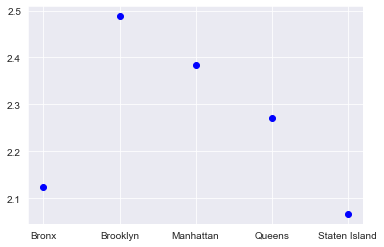

In [47]:
plt.plot(minimum_nights, 'bo')

Above figure shows people are spending more nights in Manhattan with the average of 8.5

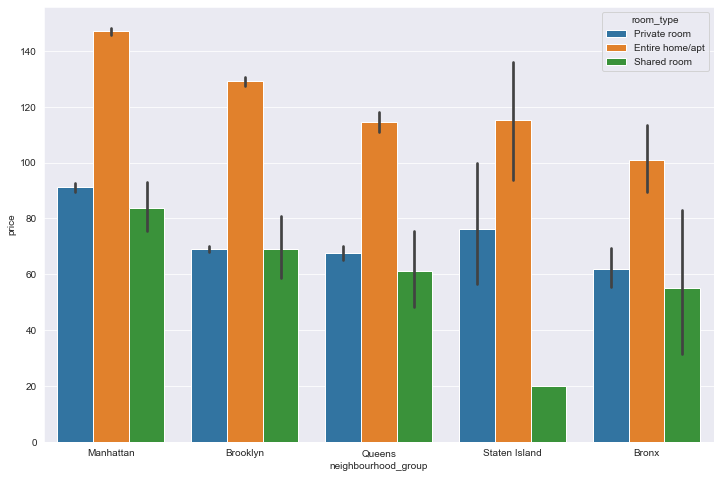

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='price',hue='room_type', data=df1)

Peoples are also spending more for entire room/Apartment as compared to private room or shred ones.

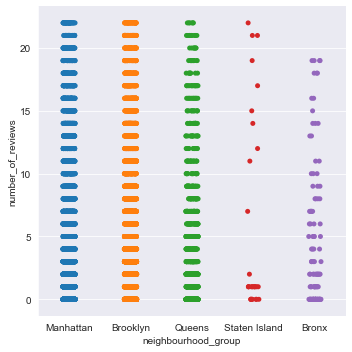

In [51]:
sns.catplot(x='neighbourhood_group', y='number_of_reviews', data=df_out_new)

plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(y='price', data=df1)

plt.subplot(222)
sns.boxplot(y='minimum_nights', data=df1)

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

IQR = Q3-Q1

print(IQR)

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,1.464000e+04,1.464000e+04,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000
mean,1.787644e+07,3.588630e+07,100.616462,2.120219,8.075478,1.146721,27.796653
std,9.864762e+06,3.723206e+07,43.498118,0.998681,10.321115,0.353840,57.139004
min,8.505000e+03,3.151000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.531438e+06,7.009014e+06,65.000000,1.000000,1.000000,1.000000,0.000000
50%,1.779341e+07,2.251161e+07,95.000000,2.000000,4.000000,1.000000,0.000000
75%,2.566793e+07,5.100211e+07,130.000000,3.000000,11.000000,1.000000,20.000000
max,3.648506e+07,1.514604e+08,199.000000,4.000000,43.000000,2.000000,268.000000


In [53]:
df1.drop('neighbourhood', inplace = True, axis=1)

In [56]:
lbl = LabelEncoder()
df1['neighbourhood_group']=lbl.fit_transform(df1['neighbourhood_group'])
df1['room_type']=lbl.fit_transform(df1['room_type'])

In [57]:
df1

,neighbourhood_group,room_type,price,minimum_nights
26,2,1,80,4
48,1,0,115,3
88,2,1,50,1
142,1,0,140,2
143,3,1,140,2
...,...,...,...,...
48861,2,0,120,1
48864,2,1,95,1
48865,2,1,80,1
48869,1,1,45,4


In [71]:
X = df1.drop('neighbourhood_group', axis=1)
y = df1.neighbourhood_group

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [84]:
ml = KNeighborsClassifier(n_neighbors=119).fit(X_train, y_train)
y_pred = ml.predict(X_test)

In [88]:
print(accuracy_score(y_pred, y_test))

0.5584342438749648


In [90]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [91]:
data

,Actual,Predicted
11501,2,2
10985,1,1
10463,2,2
12312,2,1
8101,2,1
...,...,...
41256,1,2
7051,2,1
1062,2,2
17524,2,1
